In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('spam.csv',encoding= "ISO-8859-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# removing eextra columns
data.drop(columns=['Unnamed: 2',"Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
data.sample(3)

,v1,v2
5315,ham,Hahaha..use your brain dear
2126,ham,You do got a shitload of diamonds though
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [7]:
#rename columns
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
#Labelencoding on target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target']=le.fit_transform(data["target"])

In [9]:
# missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# duplicate values
data.duplicated().sum()

403

In [11]:
# removing duplicate
data.drop_duplicates(keep='first',inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(5169, 2)

## EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

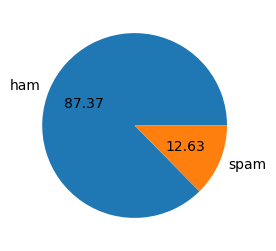

In [16]:
plt.figure(figsize=(3,3))
plt.pie(data['target'].value_counts(),autopct="%.2f",labels=['ham','spam'])
plt.show()

In [17]:
# Data is imbalance

In [18]:
import nltk

In [19]:
#downloading nltk dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#no. of characters
data['num_characters']=data['text'].apply(len)

In [21]:
#no. of words
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#for ham
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#for spam
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
# Conclusion = mean values of spam are higher than ham.(spam email/sms contains more no. of characters/words)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


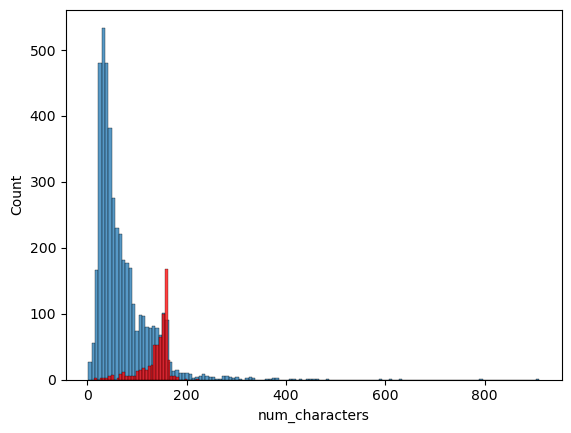

In [27]:
#ham
sns.histplot(data[data['target']==0]['num_characters'])
#spam
sns.histplot(data[data['target']==1]['num_characters'],color='r')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


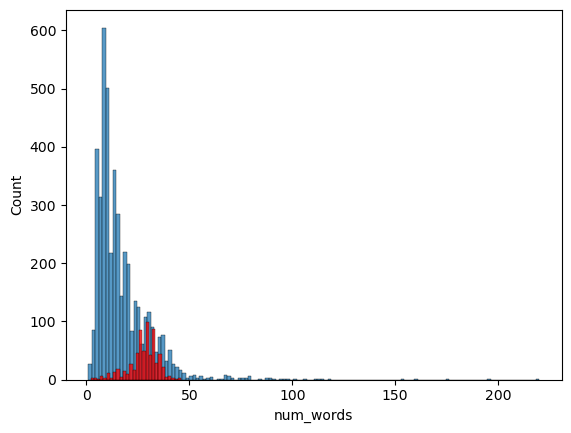

In [28]:
#ham
sns.histplot(data[data['target']==0]['num_words'])
#spam
sns.histplot(data[data['target']==1]['num_words'],color='r')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

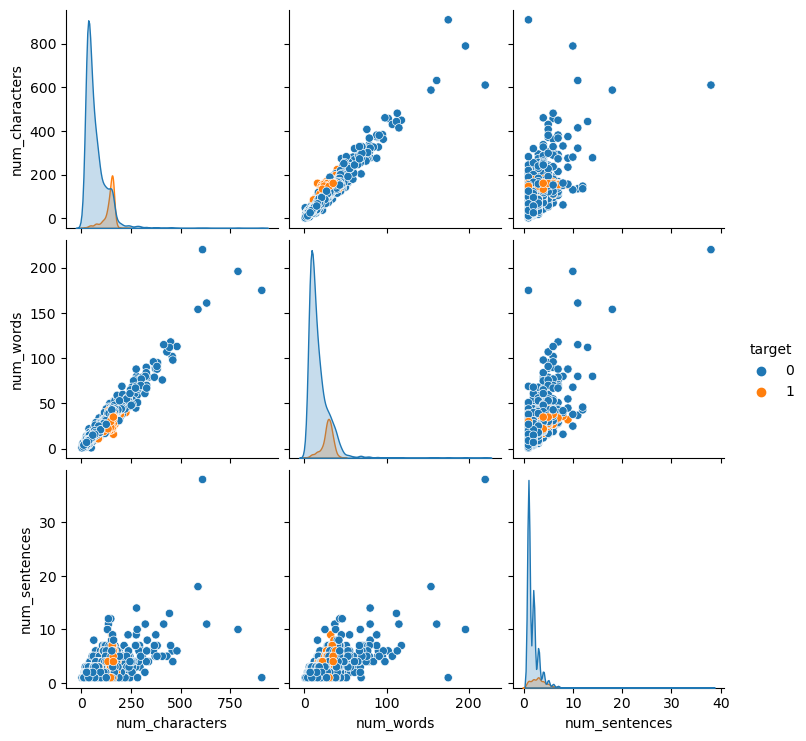

In [29]:
sns.pairplot(data,hue='target')
plt.show()

<Axes: >

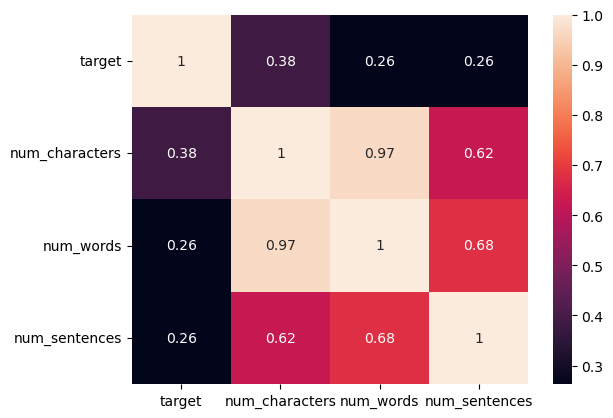

In [30]:
sns.heatmap(data[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

## Text Preprocessing
- **lower case**
- **Tokenize**
- **removing special characters**
- **removing stopwords & punctuations**
- **stemming**

In [31]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def text_preprocess(text):
    text=text.lower()
    
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [33]:
data['transformed_text']=data['text'].apply(text_preprocess)

In [34]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

In [36]:
spam=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

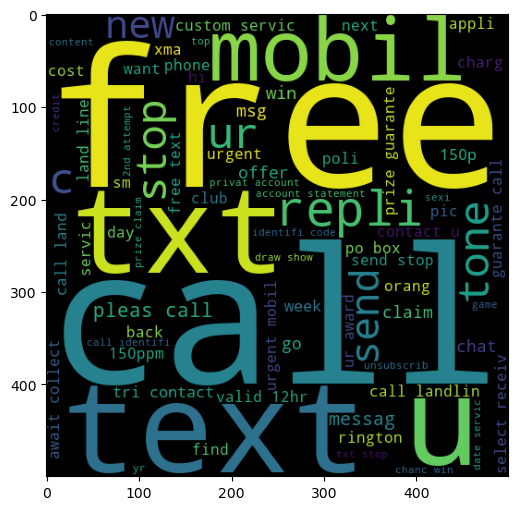

In [37]:
plt.figure(figsize=(6,6))
plt.imshow(spam)
plt.show()

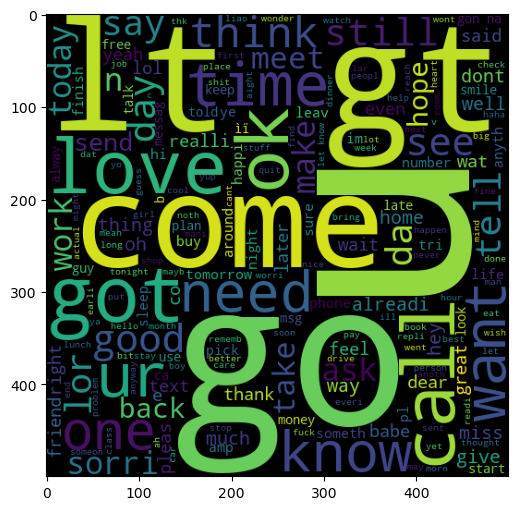

In [38]:
ham=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(ham)
plt.show()

In [39]:
# top 30 most frequent words in spam messege

In [40]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

In [42]:
from collections import Counter
top_30_spam=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [43]:
top_30_spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


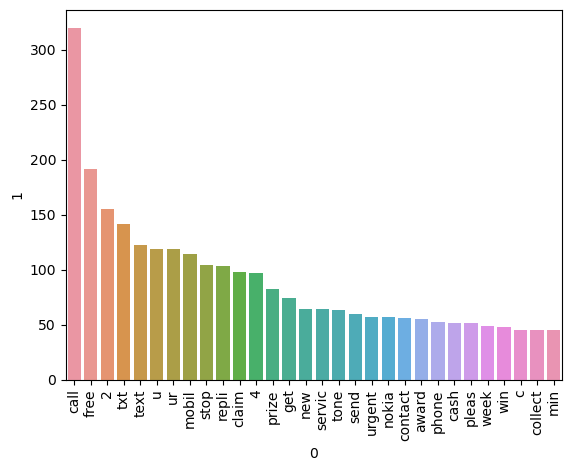

In [44]:
sns.barplot(x=top_30_spam[0],y=top_30_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
# top 30 words in ham

In [46]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

In [48]:
top_30_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))

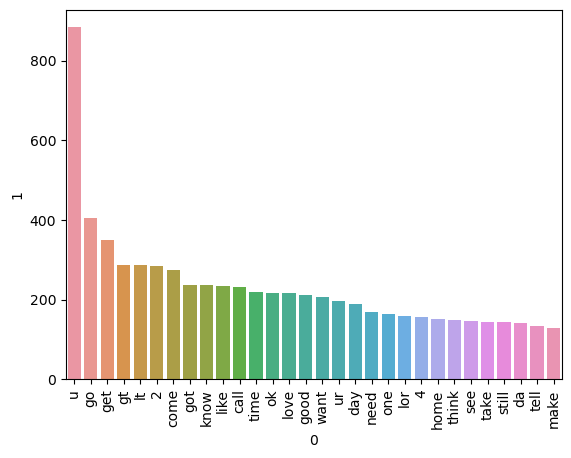

In [49]:
sns.barplot(x=top_30_ham[0],y=top_30_ham[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
data.reset_index(drop=True,inplace=True)

In [51]:
data.to_csv('spam_data.csv')

In [52]:
data.isnull().sum()

target              0
text                0
num_characters      0
num_words           0
num_sentences       0
transformed_text    0
dtype: int64

In [53]:
import pickle

In [55]:
pickle.dump(text_preprocess,open('preprocess.pkl','wb'))